# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [17]:
#The analysis of the data seems to show the Capomulin and Ramicane have the most number of time points.
#The data also infers that there are more Male mice than Female Mice.
#When looking at Final Tumor Volume for treatments we can see that Infubinol contains an ourlier whereas the other regimens are within specific ranges.
#When looking at Mouse s185 we can infer that its tumor has decreased over time.
#We can also see a correlation with the more weight a mouse has the larger the tumor tends to be.

In [18]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "C:/Users/Jason/Desktop/Module 5/module_5_starter_code/Pymaceuticals/data/Mouse_metadata.csv"
study_results_path = "C:/Users/Jason/Desktop/Module 5/module_5_starter_code/Pymaceuticals/data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_data = pd.merge(mouse_metadata, study_results, on='Mouse ID')

# Display the data table for preview
print(merged_data.head())


  Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1  


In [19]:
# Checking the number of mice.
print("Number of unique mice IDs:", len(merged_data['Mouse ID'].unique()))

Number of unique mice IDs: 249


In [20]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_data = merged_data[merged_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
print("Mouse ID with duplicate time points:")
print(duplicate_data)

Mouse ID with duplicate time points:
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
908           45.000000                 0  
909           45.000000                 0  
910           48.786801               

In [21]:
# Optional: Get all the data for the duplicate mouse ID. 


In [22]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = merged_data.drop_duplicates(subset=["Mouse ID", "Timepoint"])

In [23]:
# Checking the number of mice in the clean DataFrame.
print("Number of unique mice IDs (after cleaning):", cleaned_data["Mouse ID"].nunique())

Number of unique mice IDs (after cleaning): 249


## Summary Statistics

In [24]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.



In [25]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
summary_stats = cleaned_data.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})
summary_stats.columns = ["Mean", "Median", "Variance", "Standard Deviation", "SEM"]
summary_stats.index.name = "Drug Regimen"

print(summary_stats)

                   Mean     Median   Variance  Standard Deviation       SEM
Drug Regimen                                                               
Capomulin     40.675741  41.557809  24.947764            4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177            6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684            6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577            8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479            8.134708  0.596466
Placebo       54.033581  52.288934  61.168083            7.821003  0.581331
Propriva      52.393463  50.909965  43.138803            6.568014  0.525862
Ramicane      40.216745  40.673236  23.486704            4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562            7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355            6.966589  0.516398


## Bar and Pie Charts

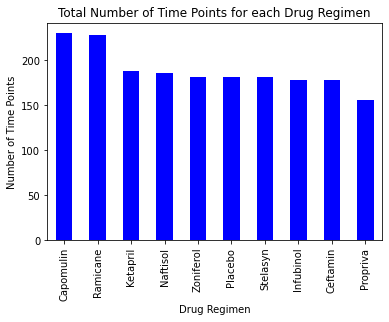

In [26]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

bar_chart_df = cleaned_data["Drug Regimen"].value_counts()
bar_chart_df.plot(kind='bar', title="Total Number of Time Points for each Drug Regimen", color='b')
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Time Points")
plt.show()

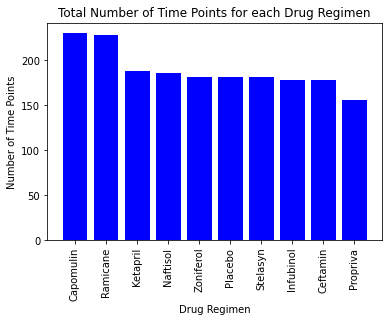

In [27]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

bar_chart_df = cleaned_data["Drug Regimen"].value_counts()
plt.bar(bar_chart_df.index, bar_chart_df.values, color='b')
plt.title("Total Number of Time Points for each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Time Points")
plt.xticks(rotation=90)
plt.show()

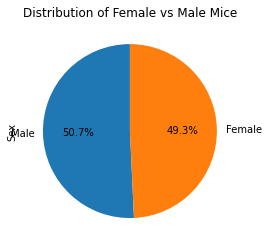

In [28]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pie_chart_df = cleaned_data["Sex"].value_counts()
pie_chart_df.plot(kind='pie', title="Distribution of Female vs Male Mice", autopct='%1.1f%%', startangle=90)
plt.show()


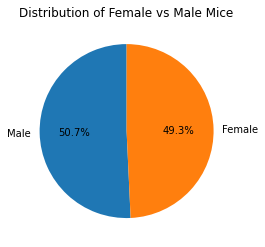

In [29]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pie_chart_df = cleaned_data["Sex"].value_counts()
plt.pie(pie_chart_df.values, labels=pie_chart_df.index, autopct='%1.1f%%', startangle=90)
plt.title("Distribution of Female vs Male Mice")
plt.show()


## Quartiles, Outliers and Boxplots

In [30]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
grouped_df = cleaned_data.groupby(["Mouse ID"]).max()
grouped_df = grouped_df.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(cleaned_data, grouped_df, on=["Mouse ID", "Timepoint"], suffixes=("", "_y"))

In [31]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)
tumor_volumes = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    
for drug in treatment_list:
    drug_df = merged_df.loc[merged_df["Drug Regimen"] == drug]
    tumor_volumes.append(drug_df["Tumor Volume (mm3)"])

for drug_volumes in tumor_volumes:
    quartiles = drug_volumes.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = drug_volumes.loc[(drug_volumes < lower_bound) | (drug_volumes > upper_bound)]
    print(f'Outliers for {drug} treatment: {outliers}')

Outliers for Ceftamin treatment: Series([], Name: Tumor Volume (mm3), dtype: float64)
Outliers for Ceftamin treatment: Series([], Name: Tumor Volume (mm3), dtype: float64)
Outliers for Ceftamin treatment: 74    36.321346
Name: Tumor Volume (mm3), dtype: float64
Outliers for Ceftamin treatment: Series([], Name: Tumor Volume (mm3), dtype: float64)


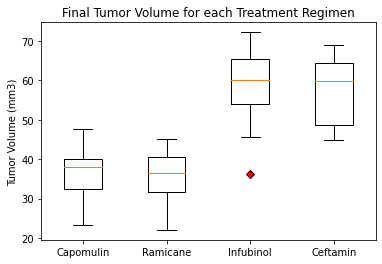

In [32]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume for each Treatment Regimen")
ax1.set_ylabel("Tumor Volume (mm3)")
ax1.boxplot(tumor_volumes, labels=treatment_list, flierprops=dict(markerfacecolor='r', marker='D'))
plt.show()

## Line and Scatter Plots

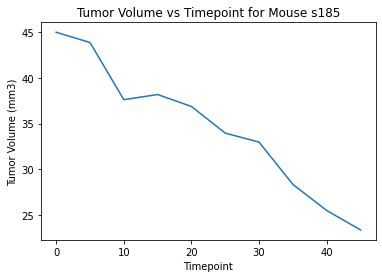

In [33]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# Get the specific mouse treated with Capomulin
capomulin_mouse = cleaned_data[(cleaned_data["Drug Regimen"] == "Capomulin") & (cleaned_data["Mouse ID"] == "s185")]

plt.plot(capomulin_mouse["Timepoint"], capomulin_mouse["Tumor Volume (mm3)"])
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume vs Timepoint for Mouse s185")
plt.show()

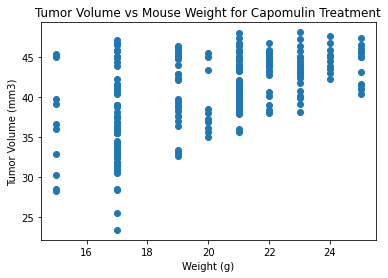

In [34]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_data = cleaned_data[cleaned_data["Drug Regimen"] == "Capomulin"]

plt.scatter(capomulin_data["Weight (g)"], capomulin_data["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume vs Mouse Weight for Capomulin Treatment")
plt.show()


## Correlation and Regression

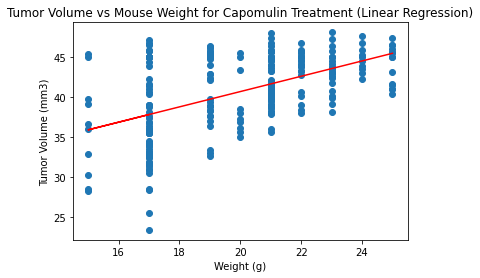

The correlation coefficient between mouse weight and average tumor volume for the Capomulin treatment is 0.525699555207717.


In [35]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(capomulin_data["Weight (g)"], capomulin_data["Tumor Volume (mm3)"])[0]
slope, intercept, r_value, p_value, std_err = st.linregress(capomulin_data["Weight (g)"], capomulin_data["Tumor Volume (mm3)"])
line = slope*capomulin_data["Weight (g)"]+intercept

plt.scatter(capomulin_data["Weight (g)"], capomulin_data["Tumor Volume (mm3)"])
plt.plot(capomulin_data["Weight (g)"], line, color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume vs Mouse Weight for Capomulin Treatment (Linear Regression)")
plt.show()

print(f"The correlation coefficient between mouse weight and average tumor volume for the Capomulin treatment is {correlation}.")